# **Let's revisit Machine Learning!**
### Greates recap of all time!
Let's implement and explain most popular ML algorithms from scratch!
I hope it's gonna be ez<br> after learning Transformer architecture and GPT<br>
<img src="https://i.ibb.co/TqW6x7f/MEME.jpg" width=40%>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Let's start with a Linear Regression!**
#### **Explanation**
Linear regression - simplest regression method I guess..<br>
It fits the data by learning slope and y-intercept of simple linear function.<br>
As in any other algorithm we use Gradient Descent for parameter tuning.<br>
In the following code:<br>
- lr - learning rate (controls speed of convergance)<br>
- cost - error score of model (the lower the better)<br>
- dw, db - partial derivatives of cost function w.r.t parameters (weights and bias respecitvely)<br>

---
specs:<br>
loss - mse<br>
optimizer - gradient descent<br>

In [2]:
class LinearRegression:
  def __init__(self):
    self.weights = None
    self.bias = 0

  def fit(self, X, y, n=100, lr=0.1, verbose=10):
    y = y.reshape(-1, 1)
    # weights initialization to zeros (runs once)
    self.m_samples, n_feats = X.shape
    self.weights = np.zeros((n_feats, 1))
    # training
    for iter in range(n):
      # prediction + feedback
      prediction = self.pred(X)
      cost = self.cost_fn(y, prediction)
      if iter % verbose == 0:
        print(f"Iteration: {iter} | Loss: {cost}")
      # update
      dw = 1 / self.m_samples * np.dot(X.T, (prediction - y))
      db = 1 / self.m_samples * np.sum((prediction - y))
      self.weights -= lr * dw
      self.bias -= lr * db

    return self.weights, self.bias

  def pred(self, X):
    return (np.dot(X, self.weights) + self.bias).reshape(-1, 1)

  def cost_fn(self, y, y_pred):
    # mean squared error used
    return 1 / self.m_samples * np.sum((y - y_pred) ** 2)

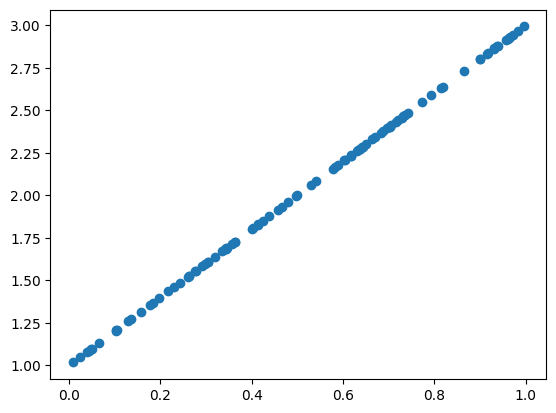

In [3]:
# generate dataset
xs = np.random.random((100, 1))
ys = xs * 2 + 1  # our w=2 and b=1


plt.scatter(xs, ys);

In [4]:
model = LinearRegression()
w, b = model.fit(xs, ys, n=500, verbose=50)
print(w, b)

Iteration: 0 | Loss: 4.444436219404342
Iteration: 50 | Loss: 0.05347078528553909
Iteration: 100 | Loss: 0.02896234641945744
Iteration: 150 | Loss: 0.015688773224560616
Iteration: 200 | Loss: 0.008498538128432523
Iteration: 250 | Loss: 0.004603620008182246
Iteration: 300 | Loss: 0.0024937603220054976
Iteration: 350 | Loss: 0.0013508587877704673
Iteration: 400 | Loss: 0.0007317541499053136
Iteration: 450 | Loss: 0.00039638794280444085
[[1.9480598]] 1.0285564185667582


In [5]:
xp = np.linspace(0, 1, 100).reshape(-1, 1)
yp = model.pred(xp)

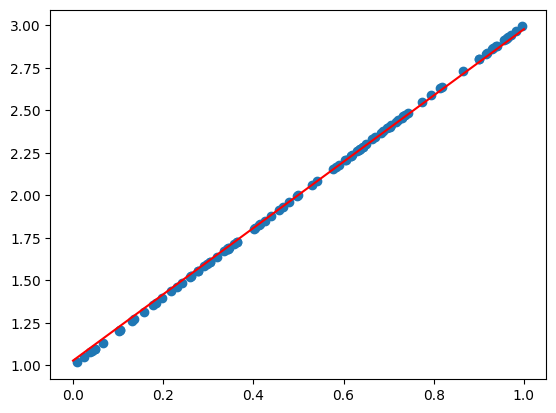

In [6]:
plt.scatter(xs, ys)
plt.plot(xp, yp, c="red");

## **I guess we're good here!**<br>
<p align="center"><img src="https://i.pinimg.com/originals/70/ea/e4/70eae4f80934ec4949fe3dc64426f0d8.jpg" width=30%></p>

### **Now Let's classify things with Logistic Regression!**


### **Logistic Regression:**
Logistic regression is used for Binary classification tasks (or for multiclass classification with more than 1 model).<br>
It's output equation is written as:<br>

$$z = Wx + b$$
$$a = {1 \over 1 + e^{-z}}$$

z is an ordinary Linear Regression, while a is just a sigmoid function applied to the linear model<br>
We can rewrite it as:<br>
$$a = sigmoid(z)$$

---

For this model we use **log_loss**, not mse, because task is defined differently.<br>
Log loss is quite simple and intuitive:<br>
$$L(y, \hat y) = - y log(\hat y) + (1-y)log(1-\hat y)$$
<br>
<img src="https://learningds.org/_images/class_loss_9_0.svg" width=60%><br>
if y (y_true) is 1 we work only with $y log(\hat y)$, because 1-y, being a multiplier for $log(1 - \hat y)$ is 0 in this case.
Left par of the equation (depicted with blue line) is a negative value (but with -1 multiplier, it's positive value) when $\hat y$ is close to 0, meaning our loss value is high (that's right, as $\hat y\approx0$, while $y=1$) and small negative value when $\hat y \approx 1$<br>
pretty much the same works for right part (when $y=0$)

In [7]:
class LogisticRegression:
  def __init__(self):
    self.weights = None
    self.bias = 0

  def fit(self, X, y, n=100, lr=0.1, verbose=10):
    y = y.reshape(-1, 1)
    self.m_samples, n_features = X.shape
    self.weights = np.zeros((n_features, 1))

    for iter in range(n):
      prediction = self.pred(X)
      cost = self.cost_fn(y, prediction)
      if iter % verbose == 0:
        print(cost)
      # update
      dw = 1 / self.m_samples * np.dot(X.T, (prediction - y))
      db = 1 / self.m_samples * np.sum(prediction - y)
      self.weights -= lr * dw
      self.bias -= lr * db
    return self.weights, self.bias

  def pred(self, X):
    return self.sigmoid(np.dot(X, self.weights) + self.bias)

  def cost_fn(self, y, y_pred):
    a = y * np.log(y_pred + 1e-7)
    b = (1 - y) * np.log(1 - y_pred + 1e-7)

    return np.mean(a - b, axis=0)

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

In [8]:
xs = np.linspace(0, 1, 100).reshape(-1, 1)
ys = xs > 0.5
print(xs.shape, ys.shape)

(100, 1) (100, 1)


In [9]:
model = LogisticRegression()
w, b = model.fit(xs, ys, n=500, verbose=50)

[5.55111512e-17]
[0.070754]
[0.07540697]
[0.06941103]
[0.0626319]
[0.05666856]
[0.0516227]
[0.0473567]
[0.04372328]
[0.04060118]


In [10]:
preds = np.round(model.pred(xs))

0.54


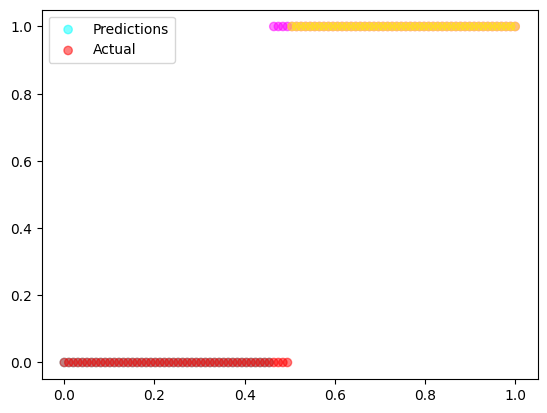

In [11]:
print(np.mean(preds))  # model predicted a bit more positives, but it's ok
plt.scatter(xs, preds, c=preds, cmap='cool', alpha=0.5, label="Predictions")
plt.scatter(xs, ys, c=ys, cmap='autumn', alpha=0.5, label="Actual")
plt.legend()
plt.show()

## **Decision Trees:**<br>
This algorithm can be used for both classification and regression tasks(of course with some minor diferences).<br>
It makes predictions by learning best **split features** and threshold for these featrues.<br> It recursively builds a tree of "questions" that split our data.<br>
Prediction is performed by traversing tree **Depth first** and returning leaf node value.<br>
Leaf node value equals to most frequent category (classification) or mean of target values on the node (regression).<br>
<img src="https://miro.medium.com/v2/resize:fit:1042/0*TBAmo7IbkCOaXuxV.png" width=60%>

---

### **How do we learn splits?**
We try all features and measure their **information gain** with a particular threshold.<br>
For categorical feature we try all its unique values as a threshold, for continuous feature we trt **midpoints** of sorted set of its values.<br>
[0, 1, 4, 6, 7] - sorted feature values<br>
[0.5, 2.5, 5, 6.5] - midpoints<br>

We pick feature with highest information gain

---

### **Information gain?**
We want to pick feature that splits data with **maximum purity** (for classification task), meaning it splits target feature really well.<br>
We can calculate purity with **entropy function** depicted below:<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/22/Binary_entropy_plot.svg" width=40%><br>
As you can see this function takes ratio of 1 of the target categories.<br>
We want to **minimize this entropy function**, as it returns minimum value for ratio of either 0 or 1.<br>
We calculate weighted sum of entropy values on both sides.<br>
We weight it by ratio of elements on each side (so they add up to 1.0)<br>
Finally, we subtract this weighted sum from entropy of root node.<br>
This is information gain.<br>
### Entropy:<br>
$$E = -\sum_{i=0}{P_i(x)log_2(P_i(x))}$$
### Information Gain:<br>
$$E_{root} - ((n_l / n)E_{left} + (n_r / n)E_{right})$$

---
## **General Sherman - the biggest tree in the world**
<img src="https://onetreeplanted.org/cdn/shop/files/pf-f38c8ac1--General-Sherman-tree.jpg?v=1685623908" width=30%><br>
But we don't want our tree to grow this tall, because tall tree = overfitted tree<br>
We stop growing depth of our tree with the following base cases:<br>
1) MaxDepth - hyperparameter that limits depth of our tree<br>
2) MinSamplesSplit - hyperparameter that sets minimum number of samples in the node to continue split<br>
3) Only 1 target class in the node (100% purity)

In [15]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, val=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.val = val

In [16]:
class DecisionTreeClf:
  def __init__(self, max_depth=50, min_samples_split=2, n_features=None):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.n_features = n_features
    self.root = None

  def fit(self, X, y):
    self.root = self.grow(X, y)

  # recursive tree building
  def grow(self, X, y, depth=0):
    m_samples, n_feats = X.shape
    n_unique = len(set(y))  # number of classes on the side
    if depth >= ((self.max_depth) or
                (m_samples < self.min_samples_split) or
                (n_unique == 1)):
                # return leaf node with value of most frequent class
                return Node(val=self.most_freq_class(y))

    # we need this for random forest ensemble (explained below)
    feature_idcs = np.random.choice(n_feats, self.n_features, replace=True)
    # find best feature and its threshold and split data
    feature, threshold = self.best_split(X, y, feature_idcs)
    left_idcs, right_idcs = self.split(X[:, feature], threshold)

    # left and right subtrees grow
    left = self.grow(X[left_idcs, :], y[left_idcs], depth+1)
    right = self.grow(X[right_idcs, :], y[right_idcs], depth+1)

    # root:
    return Node(feature, threshold, left, right)

  def best_split(self, X, y, feature_idcs):
    information_gain = -1
    best_feature = best_threshold = None

    # try all features and thresholds
    for feature_idx in feature_idcs:
      X_col = X[:, feature_idx]
      for threshold in np.unique(X_col):
        ig = self.information_gain(X_col, y, threshold)
        if ig > information_gain:
          information_gain = information_gain
          best_feature = feature_idx
          best_threshold = threshold
    return best_feature, best_threshold

  def information_gain(self, X_col, y, threshold):
    root_entropy = self.entropy(y)
    left_indices, right_indices = self.split(X_col, threshold)
    n = len(y)
    n_l, n_r = len(left_indices), len(right_indices)
    e_l, e_r = self.entropy(y[left_indices]), self.entropy(y[right_indices])
    child_entropy = (n_l / n) * e_l + (n_r / n) * e_r  # weighted sum of child entropies

    return root_entropy - child_entropy

  def entropy(self, y):
    p_s = np.bincount(y) / len(y)  # ratios of categories
    return -np.sum([p * np.log(p) for p in p_s if p > 0])

  def most_freq_class(self, y):
    counts = np.bincount(y)
    return np.argmax(counts)

  def split(self, X_col, threshold):
    left_indices = np.argwhere(X_col <= threshold).flatten()
    right_indices = np.argwhere(X_col > threshold).flatten()

    return left_indices, right_indices

  def predict(self, X):
    return [self.traverse_tree(x, self.root) for x in X]

  def traverse_tree(self, x, node):
    if node.is_leaf_node():
      return node.value

    if x[node.feature] <= node.threshold:
      return self.traverse_tree(x, node.left)
    return self.traverse_tree(x, node.right)